In [ ]:

任务4 - 模型评估（2天）
记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）
关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。


In [1]:
import numpy as np
import pandas as pd

#导入处理后的数据，4754*81
data = pd.read_csv('data/data_81col.csv')

In [2]:
# 生成训练集和测试集
from sklearn.model_selection import train_test_split
y = data['status']
X = data.drop(['status'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2018)

In [4]:
# 决策树 随机森林 和 XGBOOST 因为决策树不需要做特征标准化
#导入相关算法
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#导入模型评估分数， roc_auc_score--auc值  
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

model_list = [('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier()),('xgb',XGBClassifier())]
score_list = [('准确率',accuracy_score),('精准率',precision_score),('召回率',recall_score),('F1-score',f1_score),('AUC值',roc_auc_score),('ROC',roc_curve)]


In [44]:
result_dict = {}
df_total = pd.DataFrame()
for model_name,model in model_list:
    model.fit(X_train,y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    result_dict[model_name] = {}
    result_dict[model_name]['Train'] = []
    result_dict[model_name]['Test'] = []
    for score_name,score in score_list: 
        result_dict[model_name]['Train'].append(score(y_train,y_train_predict))
        result_dict[model_name]['Test'].append(score(y_test,y_test_predict))
        
    df = pd.DataFrame({'Train':result_dict[model_name]['Train'][:-1],
                       'Test':result_dict[model_name]['Test'][:-1]
                      })    
    df = df.T
    df.set_index([[model_name,model_name],['Train','Test']],inplace=True)
    
    df_total = pd.concat([df_total,df])

准确率       精准率       召回率  F1-score      AUC值
dt  Train  1.000000  1.000000  1.000000  1.000000  1.000000
    Test   0.688157  0.385638  0.403900  0.394558  0.593804
rf  Train  0.980763  0.998705  0.924460  0.960149  0.962030
    Test   0.776454  0.633333  0.264624  0.373281  0.606563
xgb Train  0.852119  0.853306  0.495204  0.626707  0.733362
    Test   0.785564  0.623256  0.373259  0.466899  0.648708

In [45]:
#特征标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#GridSearchCV  逻辑回归 和 SVM  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [46]:
#逻辑回归

lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

y_train_predict = lg.predict(X_train_scaled)
y_test_scaled = lg.predict(X_test_scaled)

result_dict['lg'] = {}
result_dict['lg']['Train'] = []
result_dict['lg']['Test'] = []
for score_name,score in score_list: 
    result_dict['lg']['Train'].append(score(y_train,y_train_predict))
    result_dict['lg']['Test'].append(score(y_test,y_test_predict))

df = pd.DataFrame({'Train':result_dict['lg']['Train'][:-1],
               'Test':result_dict['lg']['Test'][:-1]
              })    
df = df.T
df.set_index([['lg','lg'],['Train','Test']],inplace=True)

df_total = pd.concat([df_total,df])
        
#SVM
svc = SVC()
svc.fit(X_train_scaled,y_train)

y_train_predict = svc.predict(X_train_scaled)
y_test_scaled = svc.predict(X_test_scaled)

result_dict['svc'] = {}
result_dict['svc']['Train'] = []
result_dict['svc']['Test'] = []
for score_name,score in score_list: 
    result_dict['svc']['Train'].append(score(y_train,y_train_predict))
    result_dict['svc']['Test'].append(score(y_test,y_test_predict))

df = pd.DataFrame({'Train':result_dict['svc']['Train'][:-1],
               'Test':result_dict['svc']['Test'][:-1]
              })    
df = df.T
df.set_index([['svc','svc'],['Train','Test']],inplace=True)

df_total = pd.concat([df_total,df])

In [48]:
df_total.rename(columns=(dict(zip(np.arange(0,5),[x[0] for x in score_list[:-1]]))),inplace=True)
display(df_total)

准确率       精准率       召回率  F1-score      AUC值
dt  Train  1.000000  1.000000  1.000000  1.000000  1.000000
    Test   0.688157  0.382514  0.389972  0.386207  0.589181
rf  Train  0.983168  1.000000  0.932854  0.965261  0.966427
    Test   0.755431  0.532051  0.231198  0.322330  0.581423
xgb Train  0.852119  0.853306  0.495204  0.626707  0.733362
    Test   0.785564  0.623256  0.373259  0.466899  0.648708
lg  Train  0.801623  0.696833  0.369305  0.482759  0.657777
    Test   0.785564  0.623256  0.373259  0.466899  0.648708
svc Train  0.840397  0.910569  0.402878  0.558603  0.694820
    Test   0.785564  0.623256  0.373259  0.466899  0.648708

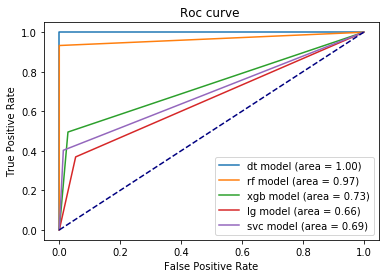

In [72]:
#训练集的 ROC 图
plt.figure()
for k in result_dict.keys():
    fpr,tpr,_ = result_dict[k]['Train'][-1]
    plt.plot(fpr,tpr,label='{} model (area = {:.2f})'.format(k,result_dict[k]['Train'][-2]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve ')
plt.show()

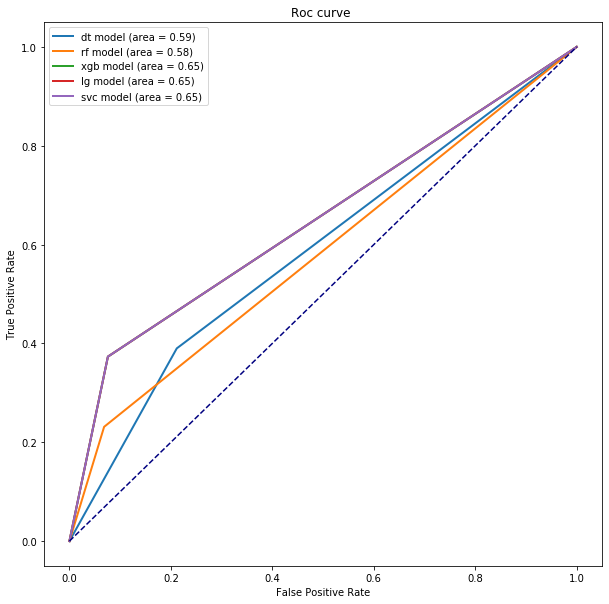

In [73]:
#测试集的ROC
plt.figure(figsize=(10,10))
for k in result_dict.keys():
    fpr,tpr,_ = result_dict[k]['Test'][-1]
    plt.plot(fpr,tpr,lw=2,label='{} model (area = {:.2f})'.format(k,result_dict[k]['Test'][-2]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve ')

plt.show()